# Introduction to Scikit-Learn

0. An end to end workflow
1. Getting the data ready
2. Choose the right estimator/Algorithm
3. Fit the model and use it to make predictions
4. Evaluate the model
5. Improve the model
6. Save and load the model
7. Putting it all together

In [2]:
#Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting our data ready to be used with ML
 1. Split the data into features and labels (X,y)
 2. Filling and disregarding missing values
 3. Converting non-numerical values to numerical values (feature codingf)

In [3]:
heart_df=pd.read_csv("heart-disease.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X=heart_df.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
y=heart_df["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [6]:
#Split the data into training and test dats
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)


In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [8]:
X_train.ndim, X_test.ndim, y_train.ndim, y_test.ndim

(2, 2, 1, 1)

### 1.1 Making our data numerical

In [9]:
car_df=pd.read_csv("car-sales-extended.csv")
car_df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [10]:
len(car_df)

1000

In [12]:
car_df.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [13]:
# Split into X/y
X=car_df.drop("Price", axis=1)
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [14]:
y=car_df["Price"]

In [15]:
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [16]:
#Split into training and test sets
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [19]:
#Build ML model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [22]:
#turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_features=["Make", "Colour", "Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               cat_features)],
                             remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [24]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [23]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [25]:
dummies=pd.get_dummies(car_df[["Make","Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [26]:
#let refit the model
np.random.seed(42)
X_train,X_test, y_train, y_test=train_test_split(transformed_X, y, test_size=0.2)

In [27]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 Dealing with Missing Data
1. Fill them with some values
2. Remove the sample with missing data altogether


In [29]:
#import data
car_sales=pd.read_csv("car-sales-extended-missing-data.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [31]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [32]:
#Create X and Y
X=car_sales.drop("Price", axis=1)
y=car_sales["Price"]

In [33]:
#Lets covert our data to numbers
#turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_features=["Make", "Colour", "Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               cat_features)],
                             remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [34]:
### Option 1: Fill missing data with pandas
car_sales["Make"].fillna("missing", inplace=True)

car_sales["Colour"].fillna("missing", inplace=True)

car_sales["Odometer (KM)"].fillna(car_sales["Odometer (KM)"].mean(), inplace=True)

car_sales["Doors"].fillna(4, inplace=True)

In [35]:
car_sales.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [36]:
#remove rows with missing price values
car_sales.dropna(inplace=True)


In [37]:
car_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [38]:
len(car_sales)

950

In [39]:
X=car_sales.drop("Price", axis=1)
y=car_sales["Price"]

In [41]:
#Lets covert our data to numbers
#turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_features=["Make", "Colour", "Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               cat_features)],
                             remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit Learn

In [45]:
car_sales_missing=pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [46]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [47]:
#drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [48]:
#Split into X and y
X=car_sales_missing.drop("Price", axis=1)
y=car_sales_missing["Price"]

In [54]:
#fill missing values with scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#fill categorical values with missing and numerical values with mean
car_imputer=SimpleImputer(strategy="constant", fill_value="missing")
door_imputer=SimpleImputer(strategy="constant", fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

#Define columsn
car_features=["Make","Colour"]
door_feature=["Doors"]
num_features=["Odometer (KM)"]

#Create an imputer (something that fills missing data)
imputer=ColumnTransformer([
    ("car_imputer", car_imputer, car_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])
#Transform the data
filled_X=imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [57]:
car_sales_filled=pd.DataFrame(filled_X,
                             columns=["Make", "Colour", "Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [60]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [61]:
#Lets covert our data to numbers
#turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_features=["Make", "Colour", "Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               cat_features)],
                             remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [62]:
#Now lets fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(transformed_X, y, test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

## 2. Choosing the Right Estimator/Algorithm for your problem
- Sklearn refers to machine learning models/algorithms as estimators
- Classification problem-predicting a category
- Regression probelm-predicting a data point

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a regression model for housing dataset

In [66]:
#Get California housing dataset
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [68]:
housing_df=pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [70]:
housing_df["target"]=housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [71]:
housing_df=housing_df.drop("MedHouseVal", axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [72]:
#import algorithm/estimator
from sklearn.linear_model import Ridge

#set up random sedd
np.random.seed(42)

#create the data
X=housing_df.drop("target", axis=1)
y=housing_df["target"] #median house price in $100,000s

#split into train and test sets
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

#instantiate and fit the model on the training set
model=Ridge()
model.fit(X_train, y_train)

#check the score of the model on the test sets
model.score(X_test, y_test) #default evalutation is R2

0.5758549611440125

In [73]:
#Lets improve the evaluation score by trying a different model
from sklearn.ensemble import RandomForestRegressor

#instantiate and fit the model on the training set
model=RandomForestRegressor()
model.fit(X_train, y_train)

#check the score of the model on the test sets
model.score(X_test, y_test)

0.8057655811971304

## 2.2 Picking a machine learnig model for a classifcation model

In [74]:
heart_check=pd.read_csv("heart-disease.csv")
heart_check.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
len(heart_check)

303

In [79]:
#based on the sklearn map import algorithm
from sklearn.svm import LinearSVC

#set up random seed
np.random.seed(42)

#make the data
X=heart_check.drop("target", axis=1)
y=heart_check["target"]

#split the data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

#instantiate linearsvc
clf=LinearSVC(max_iter=1000, dual=False)
clf.fit(X_train, y_train)

#evaluate 
clf.score(X_test, y_test)

0.8688524590163934

In [80]:
heart_check["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [82]:
#based on the sklearn map import algorithm
from sklearn.ensemble import RandomForestClassifier

#set up random seed
np.random.seed(42)

#make the data
X=heart_check.drop("target", axis=1)
y=heart_check["target"]

#split the data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

#instantiate RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train, y_train)

#evaluate 
clf.score(X_test, y_test)

0.8524590163934426

Note: If you have structured data, use ensemble methods like RandomForestClassifier
if you have unstrcutred data, use deep learning or transfer learning

## 3. Fit the model and use it to make predictions on our data

### 3.1 Fitting the model to our data

In [85]:
#based on the sklearn map import algorithm
from sklearn.ensemble import RandomForestClassifier

#set up random seed
np.random.seed(42)

#make the data
X=heart_check.drop("target", axis=1)
y=heart_check["target"]

#split the data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

#instantiate RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train, y_train)

#evaluate 
clf.score(X_test, y_test)

0.8524590163934426

### 3.2 Making prediction using our ml model

2 ways to make predictions
1. `predict()`
2. `predict_proba()`

In [87]:
# Use a trained model to make predictions
#clf.predict(np.array([1,3,7,64])) #this doesnt work. It doesnot have the same shape with what used to train our model

In [88]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [90]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [91]:
# Compare predictions to truth labels to evaluate the model
y_preds=clf.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

 Make prediciton with predict_proba()



In [94]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [95]:
#lets predict on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [96]:
heart_check["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

# predict for regression model

In [97]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [98]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create data
X=housing_df.drop("target", axis=1)
y=housing_df["target"]

#split into train and test
X_train, X_test ,y_train, y_test=train_test_split(X,y, test_size=0.2)

#create model instance
model=RandomForestRegressor()
model.fit(X_train, y_train)

#evaluate
model.score(X_test, y_test)

0.8057655811971304

In [99]:
y_preds=model.predict(X_test)
y_preds

array([0.4943   , 0.7642   , 4.9346864, ..., 4.8447587, 0.71681  ,
       1.64972  ])

In [100]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [101]:
len(y_preds), len(y_test)

(4128, 4128)

In [102]:
#Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3267155795542638

## 4. Evaluating a model 

3 ways to evaluate
- Estimators built in score() method
- The scoring parameter
- problem specific metrics function


In [111]:
### 4.1 Evaluating a model with the score method
from sklearn.ensemble import RandomForestClassifier

#set up random seed
np.random.seed(42)

#make the data
X=heart_check.drop("target", axis=1)
y=heart_check["target"]

#split the data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

#instantiate RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

#evaluate 
clf.score(X_test, y_test) #the default method for classifier is accuracy

0.8524590163934426

#lets do the is for the regression estimator

In [114]:
from sklearn.ensemble import RandomForestRegressor

#set up random sedd
np.random.seed(42)

#create the data
X=housing_df.drop("target", axis=1)
y=housing_df["target"] #median house price in $100,000s

#split into train and test sets
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)


#instantiate and fit the model on the training set
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

#check the score of the model on the test sets
model.score(X_test, y_test) #R2

0.8057655811971304

## 4.2 Evaluating using a Custom Scoring Parameter

In [115]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

#set up random seed
np.random.seed(42)

#make the data
X=heart_check.drop("target", axis=1)
y=heart_check["target"]

#split the data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

#instantiate RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)



In [116]:
#evaluate 
clf.score(X_test, y_test)

0.8524590163934426

In [117]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [118]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [119]:
np.random.seed(42)

#single training and test split score
clf_single_score=clf.score(X_test, y_test)

#take the mean of the 5fold cross validation score
clf_cross_val_score=np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [ ]:
#Default scoring parameter of classifier =mean accuracy
clf.score()

In [120]:
#Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area Under ROC curve
3. Confusion Matrix
4. Classificatin report


#### Accuracy

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_check.drop("target", axis=1)
y=heart_check["target"]

clf=RandomForestClassifier()
cross_val_score=cross_val_score(clf, X, y, cv=5)

In [126]:
np.mean(cross_val_score)

0.8248087431693989

In [134]:
print(f"Heart check classifier cross-validated accuracy:{np.mean(cross_val_score)*100:.2f}" )

Heart check classifier cross-validated accuracy:82.48


**Area under the receiver operating characteristics curve (AUC/ROC)**
- Area under curve (AUC)
- ROC curve

ROC curves are a comparison of a model true positive rate (tpr) versus a model false positive rate (fpr)

- True positive is when model predicts 1 when the true label is 1
- False postive is when model predicts 1 when the truth is 0
- True negative is when model predict 0 when the truth is 0
- False negative is when model predict 0 when the truth is 1


In [135]:
#Create x_test..etec
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [139]:
from sklearn.metrics import roc_curve

#fit the classifier
clf.fit(X_train, y_train)

#make predictions with probabilities

y_probs=clf.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.58, 0.42],
        [0.16, 0.84],
        [0.49, 0.51],
        [0.78, 0.22],
        [0.55, 0.45],
        [0.1 , 0.9 ],
        [0.29, 0.71],
        [0.98, 0.02],
        [0.1 , 0.9 ],
        [0.46, 0.54]]),
 61)

In [140]:
#0 is the negative while 1 is the positive class
y_probs_positive=y_probs[:, 1]
y_probs_positive[:10]

array([0.42, 0.84, 0.51, 0.22, 0.45, 0.9 , 0.71, 0.02, 0.9 , 0.54])

In [141]:
#calculate fpr, tpr, and thresholds
fpr, tpr, thresholds=roc_curve(y_test, y_probs_positive)

#check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.20689655, 0.24137931, 0.24137931, 0.27586207, 0.34482759,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.51724138,
       0.51724138, 0.55172414, 0.5862069 , 0.65517241, 0.72413793,
       0.79310345, 1.        ])

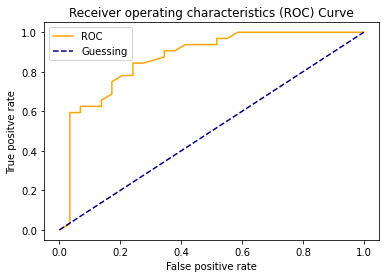

In [143]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    
    """
    Plots a roc curve using the false positive rate and true positive rate of a model
    """
    
    #plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #Plot line with no predictive power(baseline)
    
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    #customize the plot
    plt.xlabel("False positive rate")
    plt.ylabel("True positve rate")
    plt.title("Receiver operating characteristics (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [145]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8701508620689655

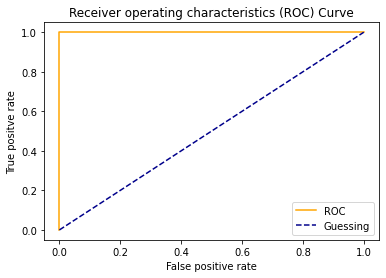

In [147]:
#Plot perfect ROC curve and AUC score
fpr, tpr, thresholds=roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [148]:
#perfect auc score 
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

In [152]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(X_test)
cf=confusion_matrix(y_test, y_preds)

In [153]:
#visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, 
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,22,7
1,5,27


<AxesSubplot:>

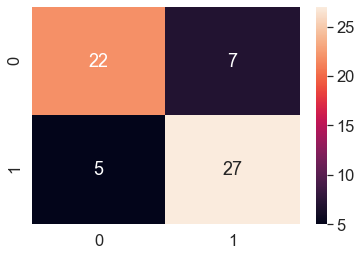

In [155]:
import seaborn as sns
sns.set(font_scale=1.5)
sns.heatmap(cf, annot=True)

# Creating confusion matrix using Sklearn

In [162]:
import sklearn
sklearn.__version__

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, y_test, y_preds)

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_estimator'

'0.24.1'

**Classificaiton Report**

In [164]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        29
           1       0.79      0.84      0.82        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [165]:
#  Where precision and recall become valuav;e
dis_true=np.zeros(10000)
dis_true[0]=1 #only one positive case

dis_preds=np.zeros(10000)#model predicts every case as 0

pd.DataFrame(classification_report(dis_true, dis_preds, output_dict=True))

C:\Users\Asabe.Dawudu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asabe.Dawudu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asabe.Dawudu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics
1. R-squared (coefficient of determination
2. MAE
3. MSE

In [166]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X=housing_df.drop("target", axis=1)
y=housing_df["target"]

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [167]:
model.score(X_test, y_test)

0.8057655811971304

In [168]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [169]:
from sklearn.metrics import r2_score
#Fill an array with y_test mean
y_test_mean=np.full(len(y_test), y_test.mean())

In [170]:
y_test_mean #if our model predicted just the mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [171]:

r2_score(y_test, y_test_mean)

0.0

In [172]:
#perfect model
r2_score(y_test, y_test)

1.0

**Mean Absolute Error**

This is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions are 

In [174]:
#MAE
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(X_test)
mae=mean_absolute_error(y_test, y_preds)
mae #on avearga each one of our predictions is /0.3/ off the actual values

0.3267155795542638

In [176]:
df=pd.DataFrame(data={"actual values":y_test,
                     "predicted values": y_preds})
df["difference"]=df["predicted values"]-df["actual values"]
df.head(10)

,actual values,predicted values,difference
20046,0.47700,0.494300,0.017300
3024,0.45800,0.764200,0.306200
15663,5.00001,4.934686,-0.065324
20484,2.18600,2.561130,0.375130
9814,2.78000,2.297640,-0.482360
13311,1.58700,1.662570,0.075570
7113,1.98200,2.341270,0.359270
7668,1.57500,1.663520,0.088520
18246,3.40000,2.482330,-0.917670
5723,4.46600,4.843458,0.377458


In [178]:
#mae is on the same scale on the data. so here the mae is $32671 average difference between actual and predicted
np.abs(df["difference"]).mean()

0.326715579554263

**Mean Square Error**
MSE is the mean square of the errors between predicted and actual values


In [179]:
from sklearn.metrics import mean_squared_error
y_preds=model.predict(X_test)
mse=mean_squared_error(y_test, y_preds)
mse

0.25452652628268335

In [181]:
df["squared_differences"]=np.square(df["difference"])
df.head()

,actual values,predicted values,difference,squared_differences
20046,0.47700,0.494300,0.017300,0.000299
3024,0.45800,0.764200,0.306200,0.093758
15663,5.00001,4.934686,-0.065324,0.004267
20484,2.18600,2.561130,0.375130,0.140723
9814,2.78000,2.297640,-0.482360,0.232671


In [183]:
squared=np.square(df["difference"])
squared.mean()

0.2545265262826839

In [184]:
#mse is on the same scale of the same values

In [189]:
df_large_error=df.copy()
df_large_error.iloc[1:100]=16

In [190]:
df_large_error.head()

,actual values,predicted values,difference,squared_differences
20046,0.477,0.4943,0.0173,0.000299
3024,16.000,16.0000,16.0000,16.000000
15663,16.000,16.0000,16.0000,16.000000
20484,16.000,16.0000,16.0000,16.000000
9814,16.000,16.0000,16.0000,16.000000


In [191]:
squared_large_error=np.square(df_large_error["difference"])
squared_large_error.mean()

6.390478139705776

#mse becomes big larger becuase of outliers. It penelizes for outliers, it amplifies larger differences

### 4.2.3 Using the Scoring Parameter

In [194]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_check.drop("target", axis=1)
y=heart_check["target"]

clf=RandomForestClassifier()


In [195]:
np.random.seed(42)

#cross validation accuracy
cv_acc=cross_val_score(clf, X, y, cv=5, scoring=None) #if scoring=None, estimator's defualt evaluation metrics is used which is accuracy for classification
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [196]:
# Cross validated accuracy
print(f"The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is:82.48%


In [197]:
np.random.seed(42)
cv_acc=cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [198]:
print(f"The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is:82.48%


In [199]:
#Precision 
np.random.seed(42)
cv_precision=cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [200]:
print(f"The cross-validated precision is:{np.mean(cv_precision)}")

The cross-validated precision is:0.8329547346025924


In [201]:
#Recall
np.random.seed(42)
cv_recall=cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [202]:
print(f"The cross-validated recall is:{np.mean(cv_recall)}")

The cross-validated recall is:0.8545454545454545


Let's see the scoring parameter for regression problem

In [207]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=housing_df.drop("target", axis=1)
y=housing_df["target"]

model=RandomForestRegressor()


In [208]:
np.random.seed(42)

#cross validation accuracy
cv_r2=cross_val_score(model, X, y, cv=3, scoring=None) #if scoring=None, estimator's defualt evaluation metrics is used which is accuracy for classification
np.mean(cv_r2)

0.6538316966195948

In [209]:
cv_r2

array([0.61884272, 0.72091799, 0.62173438])

In [216]:
#Mean squared error
cv_mse=cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.43082018879832207

In [217]:
cv_mse #zero is the best value bacause of the negative

array([-0.52859246, -0.34663999, -0.3748842 , -0.44024564, -0.46373866])

In [218]:
#Mean Absolute error
cv_mae=cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.465321780513566

In [219]:
cv_mae #zero is the best value bacause of the negative

array([-0.54211714, -0.40855225, -0.43897741, -0.46270772, -0.47425439])

## 4.3 Using different evaluation as Scikit learn functions

The 3rd way to evaluate sckit learn machine learning models/estimators is to use the `sklearn.metrics` module-

In [220]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Create X and Y
X=heart_check.drop("target", axis=1)
y=heart_check["target"]

#split the data
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

#Create model
clf=RandomForestClassifier()

#fit the model
clf.fit(X_train, y_train)

#predict
y_preds=clf.predict(X_test)

#evaluate model using evaluation functions
print(f"Accuracy:{accuracy_score(y_test, y_preds)*100:.2f}%" )
print(f"Precision:{precision_score(y_test, y_preds):.2f}" )
print(f"Recall:{recall_score(y_test, y_preds):.2f}")
print(f"F1:{f1_score(y_test, y_preds):.2f}")

Accuracy:85.25%
Precision:0.78
Recall:0.97
F1:0.86


**Regression Metrics**

In [223]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#create X and y
X=housing_df.drop("target", axis=1)
y=housing_df["target"]

#split the data
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

#Create model and fit
model=RandomForestRegressor()
model.fit(X_train, y_train)

#predict
y_preds=model.predict(X_test)

#evaluate
print(f"r2:{r2_score(y_test, y_preds)}")
print(f"mae:{mean_absolute_error(y_test, y_preds)}" )
print(f"mse:{mean_squared_error(y_test, y_preds)}")


r2:0.8076322322262705
mae:0.32789960096899246
mse:0.2516595229269194


## 5. Improving a Model
First predictions are the baseline predictions  and first model is the baseline model

To improve
- Could we collect more data ? (generally, the more data, the better)
- Could we improve the data? 

From a model perpective
- is there a better model to use?
- Could we improve the current model?

Parameters ve hyperparamets
- Parameters=model find patterns in data
- Hyperparametes= you adjust to improve the model ability to find the patterns

In [225]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

In [226]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Three ways to adjust hyperparametes
- by hand
- Randomly with RandomseachCV
- Exhaustively with GridsearchCV

### 5.1 : Tuning hyperparameters by hand

Lets make 3 sets, training, validation and test

We are to adjust:
- max_depth,
- max_features
- min_sample_leaf
- min_sample_split
- n_estimators


In [228]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true lables vs y_preds labels
    on a classification
    """
    accuracy=accuracy_score(y_true, y_preds)
    precision=precision_score(y_true, y_preds)
    recall=recall_score(y_true, y_preds)
    f1=f1_score(y_true, y_preds)
    metric_dict={'accuracy':round(accuracy,2),
                'precision':round(precision, 2),
                'recall':round(recall, 2),
                'f1':round(f1, 2)}
    print(f"Acc:{accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1 Score: {f1:.2f}" )
    
    return metric_dict

In [231]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle the data
heart_check_shuffled=heart_check.sample(frac=1)

#split the data
X=heart_check_shuffled.drop("target", axis=1)
y=heart_check_shuffled["target"] 

#split the data
train_split=round(0.7 * len(heart_check_shuffled))#70% of the data
val_split=round(train_split + 0.15 * len(heart_check_shuffled))#15% of the data
X_train, y_train= X[:train_split], y[:train_split]
X_valid, y_valid=X[train_split:val_split], y[train_split:val_split]
X_test, y_test=X[val_split:], y[val_split:]

clf=RandomForestClassifier()
clf.fit(X_train, y_train)

#make baseline predicitons
y_preds=clf.predict(X_valid)

#evalaute the classifier on validation set
baseline_metrics=evaluate_preds(y_valid, y_preds)

Acc:82.22%
Precision: 0.81
Recall:0.88
F1 Score: 0.85


In [232]:
#Create a different classifier with different hyperparameters
clf_2=RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

#Make predictions with different hyperparameters
y_preds_2=clf_2.predict(X_valid)

#Evaluate the 2nd classifier
clf_2_metrics=evaluate_preds(y_valid, y_preds_2)

Acc:84.44%
Precision: 0.85
Recall:0.88
F1 Score: 0.86


In [233]:
#Create a different classifier with different hyperparameters
clf_3=RandomForestClassifier(n_estimators=100,
                            max_depth=10)
clf_3.fit(X_train, y_train)

#Make predictions with different hyperparameters
y_preds_3=clf_3.predict(X_valid)

#Evaluate the 2nd classifier
clf_3_metrics=evaluate_preds(y_valid, y_preds_3)

Acc:80.00%
Precision: 0.81
Recall:0.84
F1 Score: 0.82


### 5.2 Hyperparamters Tunning with RandomizedSearchCV

In [237]:
from sklearn.model_selection import RandomizedSearchCV

grid={"n_estimators": [10,100,200,500,1000,1200],
     "max_depth":[None, 5,10,20,30],
     "max_features":["auto", "sqrt"],
     "min_samples_split": [2,4,6],
     "min_samples_leaf":[1,2,4]}

np.random.seed(42)

#Split into X and Y
X=heart_check_shuffled.drop("target", axis=1)
y=heart_check_shuffled["target"]

#Split into train and test sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)

#Setup RandomizedSearchSV
rs_clf=RandomizedSearchCV(estimator=clf,
                         param_distributions=grid, 
                         n_iter=10,#number of models to try
                         cv=5,
                         verbose=2)
#fit the RandomizedSearchCV version of clf #cv means cross validation
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [238]:
rs_clf.best_params_ #getting the best parameters for our model

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [239]:
#Make prediction with the best hyperparameters
rs_y_preds=rs_clf.predict(X_test)

#evaluate the prediction
rs_metrics=evaluate_preds(y_test, rs_y_preds)

Acc:81.97%
Precision: 0.77
Recall:0.86
F1 Score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [240]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [241]:
grid_2={'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [243]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

#Split into X and Y
X=heart_check_shuffled.drop("target", axis=1)
y=heart_check_shuffled["target"]

#Split into train and test sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)

#Setup GridSearchSV
gs_clf=GridSearchCV(estimator=clf,
                         param_grid=grid_2, 
                         cv=5,
                         verbose=2)

#fit the GridSearchCV version of clf #cv means cross validation
gs_clf.fit(X_train, y_train);


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [244]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [245]:
gs_y_preds=gs_clf.predict(X_test)

#evaluate the predictions
gs_metrics=evaluate_preds(y_test, gs_y_preds)

Acc:78.69%
Precision: 0.74
Recall:0.82
F1 Score: 0.78


Let's compare our different models metrics.

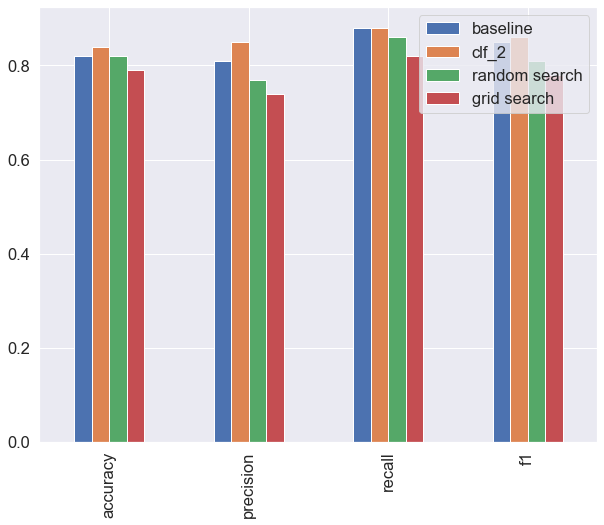

In [247]:
compare_metrics=pd.DataFrame({"baseline":baseline_metrics,
                             "clf_2":clf_2_metrics,
                             "random search":rs_metrics,
                              "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

## 6. Saving and Loading Trained Machine Learning Models

Two ways to do this
- python `pickle` module
- python `joblib` module

In [249]:
import pickle

#Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb")) #write binary

In [250]:
# Load a saved model
loaded_pickle_model=pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [251]:
#make some predicitons
pickle_y_preds=loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc:78.69%
Precision: 0.74
Recall:0.82
F1 Score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [255]:
from joblib import dump, load

#Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [257]:
#import a saved joblib model
loaded_joblib_model=load(filename="gs_random_forest_model_1.joblib")

In [258]:
#make and evaluate joblib predictions
joblib_y_preds=loaded_joblib_model.predict(X_test)

In [259]:
evaluate_preds(y_test, joblib_y_preds)

Acc:78.69%
Precision: 0.74
Recall:0.82
F1 Score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## 7. Putting it all together

In [260]:
data=pd.read_csv("car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [261]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [262]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do in one cell:
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [264]:
#Data preprocessing dependencies
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modeling dependencies
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#setup random seed
import numpy as np
np.random.seed(42)

#import data and drop rows with missing labels
data=pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

#Define different features and transformer pipeline
categorical_features=["Make", "Colour"]
categorical_transformer=Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_feature=["Doors"]
door_transformer=Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features=["Odometer (KM)"]
numeric_transformer=Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

#setup preprocessing steps (fill missing values and convert numbers)
preprocessor=ColumnTransformer(
                        transformers=[
                            ("cat", categorical_transformer, categorical_features),
                            ("door", door_transformer, door_feature),
                            ("num", numeric_transformer, numeric_features)
                        ])

#Creating a preprocessing and modeling pipeline
model=Pipeline(steps=[("preprocessor", preprocessor),
                     ("model", RandomForestRegressor())])
#split the data
X=data.drop("Price", axis=1)
y=data["Price"]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

#fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.22188417408787875

its also possible to use GridsearchCV or RandomizedSearchCV on our pipeline

In [266]:
#Use  GridSearchCV with our regression Pipeline
pipe_grid={
    "preprocessor__num__imputer__strategy":["mean", "median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None, 5],
    "model__max_features":["auto"],
    "model__min_samples_split":[2,4]
    
}

gs_model=GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.6s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [267]:
gs_model.score(X_test, y_test)

0.3339554263158365